<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Correlation**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis (EDA). You will examine the distribution of the data, identify outliers, and determine the correlation between different columns in the dataset.


## Objectives


In this lab, you will perform the following:


- Identify the distribution of compensation data in the dataset.

- Remove outliers to refine the dataset.

- Identify correlations between various features in the dataset.


## Hands on Lab


##### Step 1: Install and Import Required Libraries


In [1]:
# Install the necessary libraries
!pip install pandas
!pip install matplotlib
!pip install seaborn

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Step 2: Load the Dataset


In [2]:
# Load the dataset from the given URL
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(file_url)

# Display the first few rows to understand the structure of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h3>Step 3: Analyze and Visualize Compensation Distribution</h3>


**Task**: Plot the distribution and histogram for `ConvertedCompYearly` to examine the spread of yearly compensation among respondents.


Displaying histogram for yearly compensation...


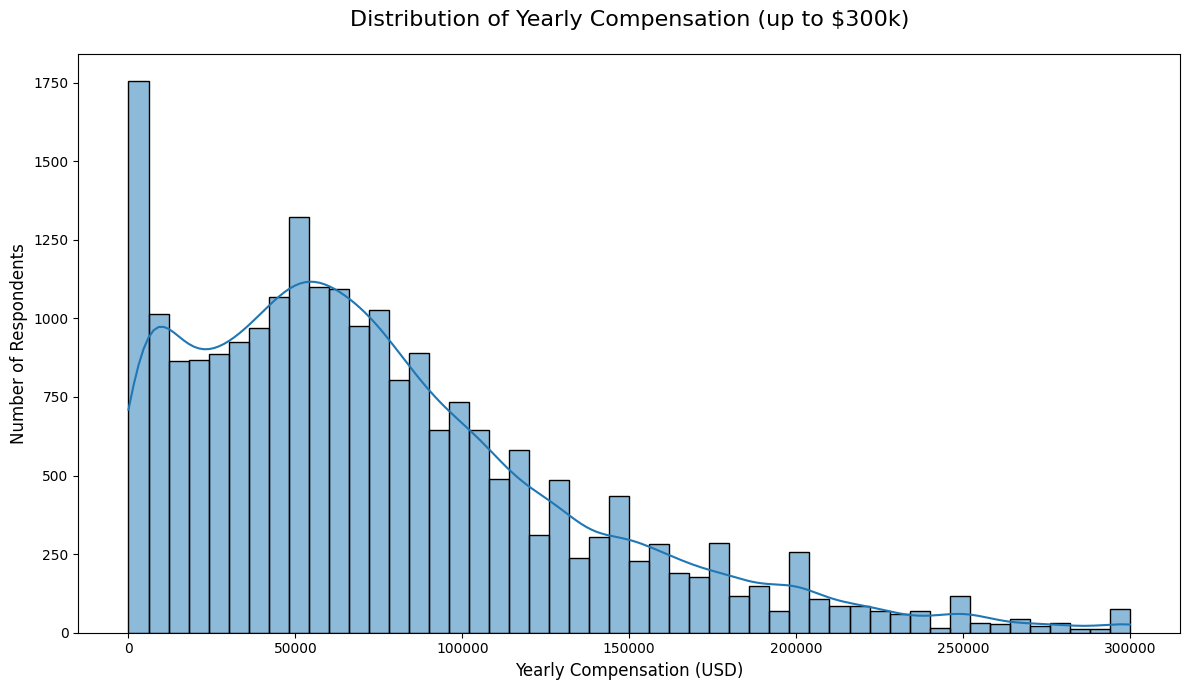

In [3]:
## Write your code here
try:
    # Attempt to load the dataset.
    df = pd.read_csv(file_url)

    # --- Data Preparation ---
    # Drop rows where 'ConvertedCompYearly' is not specified to ensure clean data for plotting.
    comp_data = df['ConvertedCompYearly'].dropna()

    # --- Visualization (Histogram and KDE Plot) ---
    plt.figure(figsize=(12, 7))

    # Plot a histogram with a Kernel Density Estimate (KDE) to show the distribution shape.
    # We'll cap the x-axis for better visibility, as extreme outliers can make the
    # main distribution hard to see.
    sns.histplot(comp_data[comp_data <= 300000], bins=50, kde=True)

    # Set titles and labels for clarity
    plt.title('Distribution of Yearly Compensation (up to $300k)', fontsize=16, pad=20)
    plt.xlabel('Yearly Compensation (USD)', fontsize=12)
    plt.ylabel('Number of Respondents', fontsize=12)
    plt.ticklabel_format(style='plain', axis='x') # Prevent scientific notation

    plt.tight_layout()
    print("Displaying histogram for yearly compensation...")
    plt.show()


except FileNotFoundError:
    print("\nError: The file 'survey_results_public.csv' was not found.")
    print("Please ensure the dataset file is in the correct directory and try again.")
except KeyError:
    print("\nError: 'ConvertedCompYearly' column not found in the dataset.")
    print("Please check the column names in your CSV file.")



<h3>Step 4: Calculate Median Compensation for Full-Time Employees</h3>


**Task**: Filter the data to calculate the median compensation for respondents whose employment status is "Employed, full-time."


--- Compensation Analysis ---
Median Yearly Compensation (Full-Time): $69,814.00
----------------------------------------

Displaying histogram for yearly compensation...


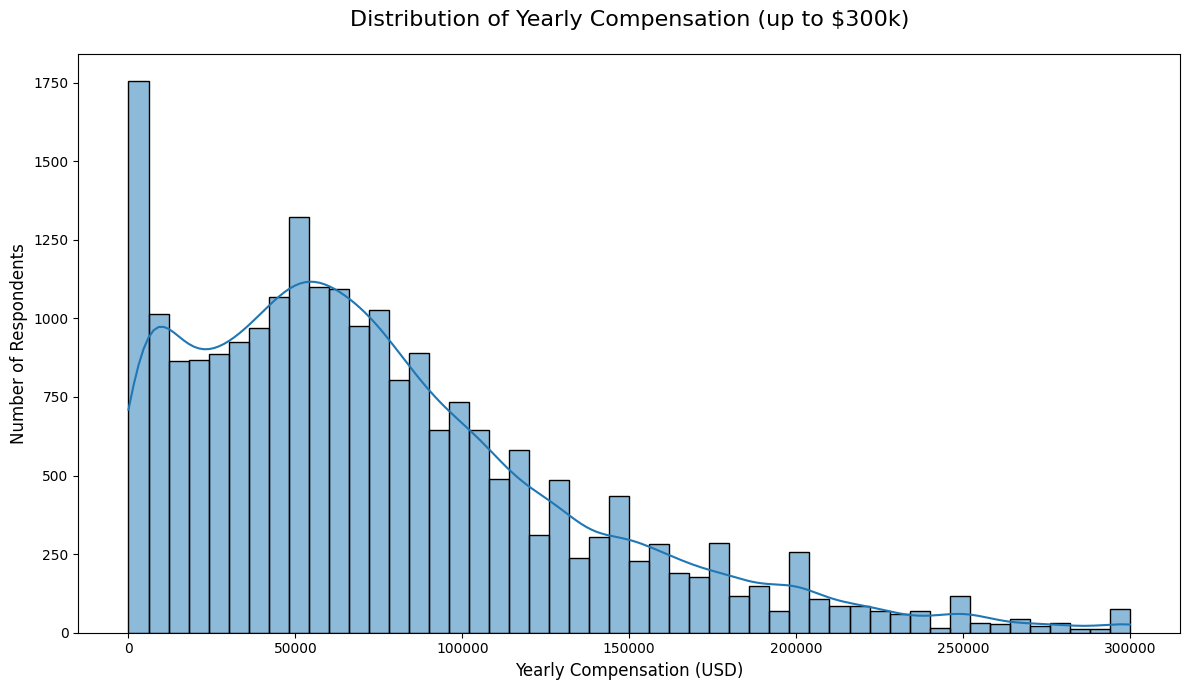

In [4]:
## Write your code here
try:
    # Attempt to load the dataset.
    df = pd.read_csv(file_url)

    # --- Data Preparation ---
    # Drop rows where 'ConvertedCompYearly' is not specified to ensure clean data for plotting.
    comp_data = df['ConvertedCompYearly'].dropna()

    # --- Calculate Median for Full-Time Employees ---
    # Filter the DataFrame for respondents who are 'Employed, full-time'.
    full_time_df = df[df['Employment'] == 'Employed, full-time']
    # Calculate the median compensation for this subset.
    median_comp_full_time = full_time_df['ConvertedCompYearly'].median()
    
    print("--- Compensation Analysis ---")
    print(f"Median Yearly Compensation (Full-Time): ${median_comp_full_time:,.2f}")
    print("-" * 40)


    # --- Visualization (Histogram and KDE Plot) ---
    plt.figure(figsize=(12, 7))

    # Plot a histogram with a Kernel Density Estimate (KDE) to show the distribution shape.
    # We'll cap the x-axis for better visibility, as extreme outliers can make the
    # main distribution hard to see.
    sns.histplot(comp_data[comp_data <= 300000], bins=50, kde=True)

    # Set titles and labels for clarity
    plt.title('Distribution of Yearly Compensation (up to $300k)', fontsize=16, pad=20)
    plt.xlabel('Yearly Compensation (USD)', fontsize=12)
    plt.ylabel('Number of Respondents', fontsize=12)
    plt.ticklabel_format(style='plain', axis='x') # Prevent scientific notation

    plt.tight_layout()
    print("\nDisplaying histogram for yearly compensation...")
    plt.show()


except FileNotFoundError:
    print("\nError: The file 'survey_results_public.csv' was not found.")
    print("Please ensure the dataset file is in the correct directory and try again.")
except KeyError as e:
    print(f"\nError: Column not found in the dataset: {e}")
    print("Please check the column names in your CSV file.")



<h3>Step 5: Analyzing Compensation Range and Distribution by Country</h3>


Explore the range of compensation in the ConvertedCompYearly column by analyzing differences across countries. Use box plots to compare the compensation distributions for each country to identify variations and anomalies within each region, providing insights into global compensation trends.



/tmp/ipykernel_826/536127225.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


Displaying box plots for compensation by country...


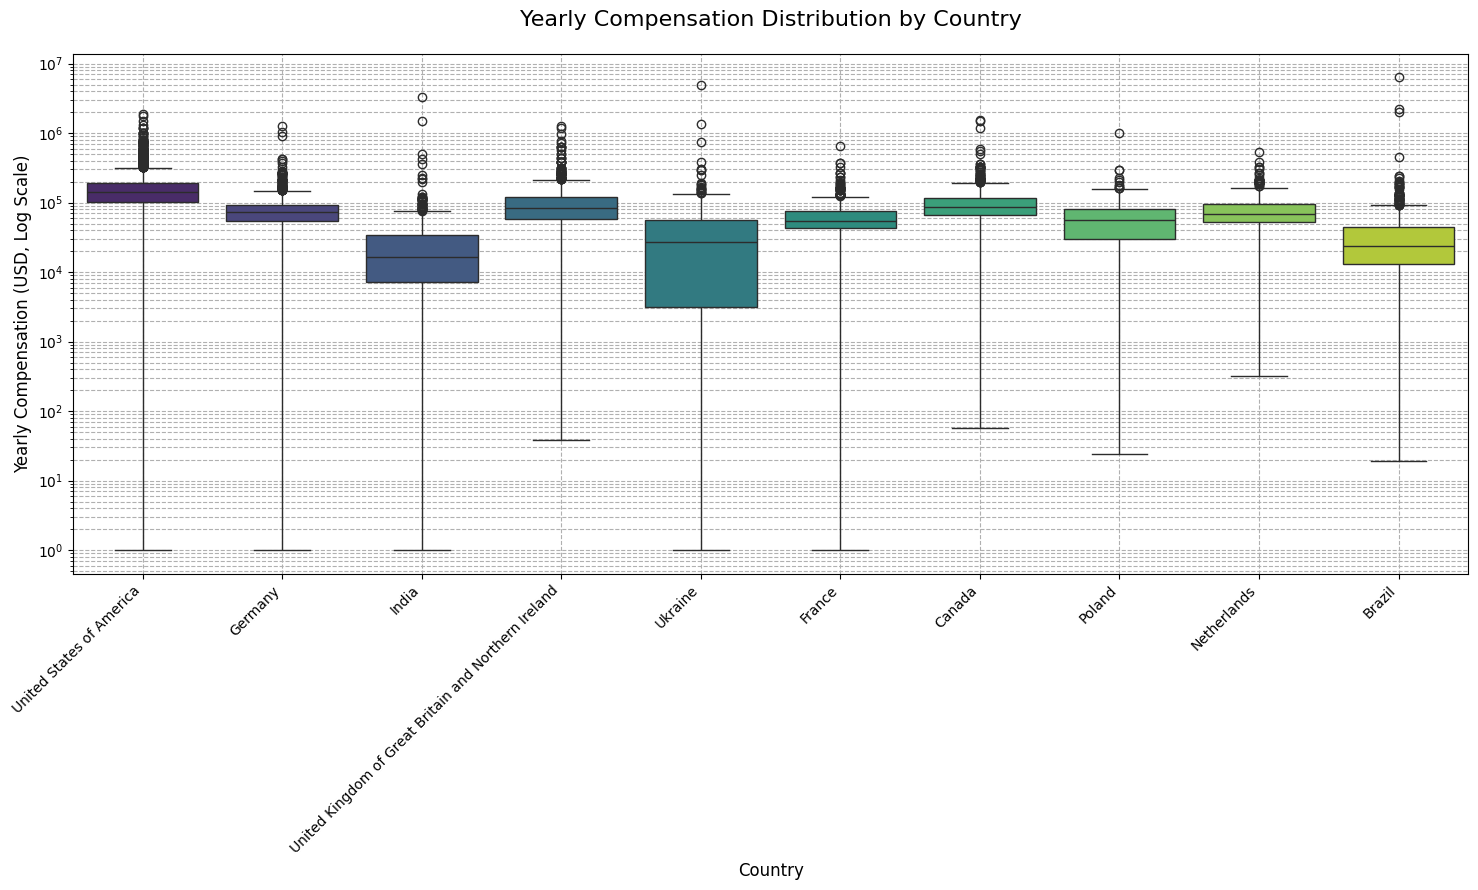

In [5]:
## Write your code here
try:
    # Attempt to load the dataset.
    df = pd.read_csv(file_url)

    # --- Data Preparation ---
    # To create a readable plot, we'll focus on the top 10 countries with the most respondents.
    top_countries = df['Country'].value_counts().nlargest(10).index
    
    # Filter the DataFrame to include only data from these top countries.
    df_top_countries = df[df['Country'].isin(top_countries)]

    # Drop rows where 'ConvertedCompYearly' is missing to ensure clean data for plotting.
    df_cleaned = df_top_countries.dropna(subset=['ConvertedCompYearly'])


    # --- Visualization (Box Plots by Country) ---
    plt.figure(figsize=(15, 9))

    # Create a box plot to compare the compensation distributions for each country.
    sns.boxplot(
        x='Country',
        y='ConvertedCompYearly',
        data=df_cleaned,
        order=top_countries, # Ensure consistent ordering
        palette='viridis'
    )

    # Use a logarithmic scale for the y-axis to better visualize the spread,
    # as compensation data is often heavily skewed by high earners.
    plt.yscale('log')
    plt.grid(True, which="both", ls="--")

    # Set titles and labels for clarity
    plt.title('Yearly Compensation Distribution by Country', fontsize=16, pad=20)
    plt.xlabel('Country', fontsize=12)
    plt.ylabel('Yearly Compensation (USD, Log Scale)', fontsize=12)
    plt.xticks(rotation=45, ha='right') # Rotate labels for readability

    plt.tight_layout()
    print("Displaying box plots for compensation by country...")
    plt.show()


except FileNotFoundError:
    print("\nError: The file 'survey_results_public.csv' was not found.")
    print("Please ensure the dataset file is in the correct directory and try again.")
except KeyError as e:
    print(f"\nError: Column not found in the dataset: {e}")
    print("Please check the column names in your CSV file.")



<h3>Step 6: Removing Outliers from the Dataset</h3>


**Task**: Create a new DataFrame by removing outliers from the `ConvertedCompYearly` column to get a refined dataset for correlation analysis.


Removed 529 outliers based on the IQR method.
--------------------------------------------------
Displaying box plots for compensation by country (outliers removed)...


/tmp/ipykernel_826/1934379009.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


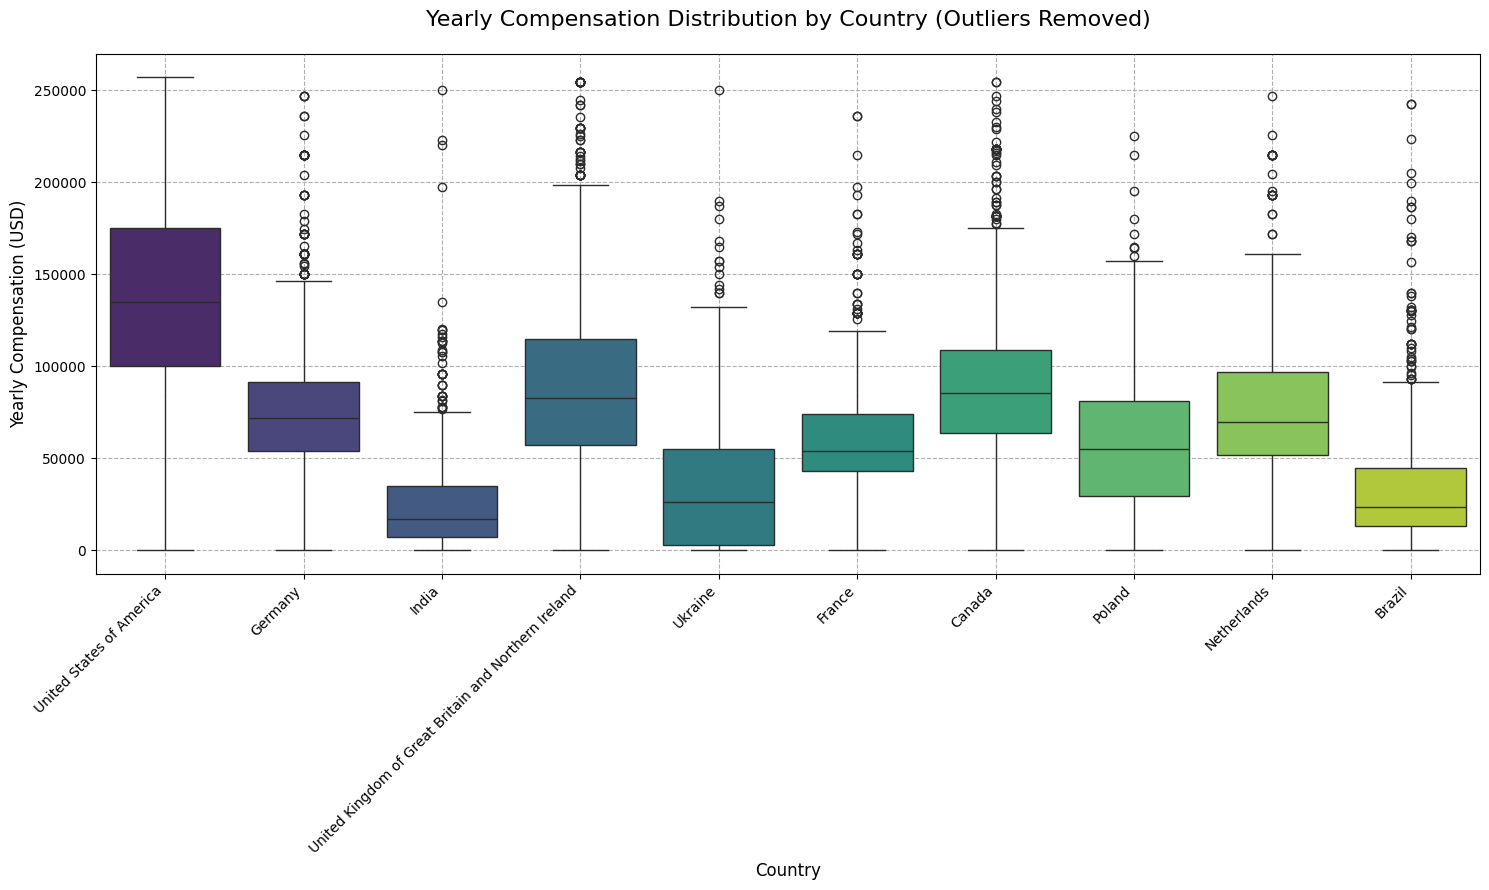

In [6]:
## Write your code here
try:
    # Attempt to load the dataset.
    df = pd.read_csv(file_url)

    # --- Data Preparation ---
    # To create a readable plot, we'll focus on the top 10 countries with the most respondents.
    top_countries = df['Country'].value_counts().nlargest(10).index
    
    # Filter the DataFrame to include only data from these top countries.
    df_top_countries = df[df['Country'].isin(top_countries)]

    # Drop rows where 'ConvertedCompYearly' is missing to ensure clean data for plotting.
    df_cleaned = df_top_countries.dropna(subset=['ConvertedCompYearly'])

    # --- Remove Outliers using IQR Method ---
    # For a clearer visualization of the main distributions, we can remove extreme outliers.
    Q1 = df_cleaned['ConvertedCompYearly'].quantile(0.25)
    Q3 = df_cleaned['ConvertedCompYearly'].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR
    
    # Create a new DataFrame excluding the outliers.
    df_no_outliers = df_cleaned[df_cleaned['ConvertedCompYearly'] <= upper_bound]
    
    print(f"Removed {len(df_cleaned) - len(df_no_outliers)} outliers based on the IQR method.")
    print("-" * 50)


    # --- Visualization (Box Plots by Country, Outliers Removed) ---
    plt.figure(figsize=(15, 9))

    # Create a box plot using the DataFrame that has outliers removed.
    sns.boxplot(
        x='Country',
        y='ConvertedCompYearly',
        data=df_no_outliers,
        order=top_countries, # Ensure consistent ordering
        palette='viridis'
    )

    # Note: A logarithmic scale may not be necessary after removing extreme outliers,
    # but can still be useful if the data remains skewed.
    # plt.yscale('log') 
    plt.grid(True, which="both", ls="--")

    # Set titles and labels for clarity
    plt.title('Yearly Compensation Distribution by Country (Outliers Removed)', fontsize=16, pad=20)
    plt.xlabel('Country', fontsize=12)
    plt.ylabel('Yearly Compensation (USD)', fontsize=12)
    plt.xticks(rotation=45, ha='right') # Rotate labels for readability

    plt.tight_layout()
    print("Displaying box plots for compensation by country (outliers removed)...")
    plt.show()


except FileNotFoundError:
    print("\nError: The file 'survey_results_public.csv' was not found.")
    print("Please ensure the dataset file is in the correct directory and try again.")
except KeyError as e:
    print(f"\nError: Column not found in the dataset: {e}")
    print("Please check the column names in your CSV file.")



<h3>Step 7: Finding Correlations Between Key Variables</h3>


**Task**: Calculate correlations between `ConvertedCompYearly`, `WorkExp`, and `JobSatPoints_1`. Visualize these correlations with a heatmap.


--- Correlation Matrix ---
                     ConvertedCompYearly  WorkExp  JobSatPoints_1
ConvertedCompYearly                  NaN      NaN             NaN
WorkExp                              NaN      NaN             NaN
JobSatPoints_1                       NaN      NaN             NaN
--------------------------------------------------

Displaying correlation heatmap...


/opt/conda/lib/python3.12/site-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/opt/conda/lib/python3.12/site-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


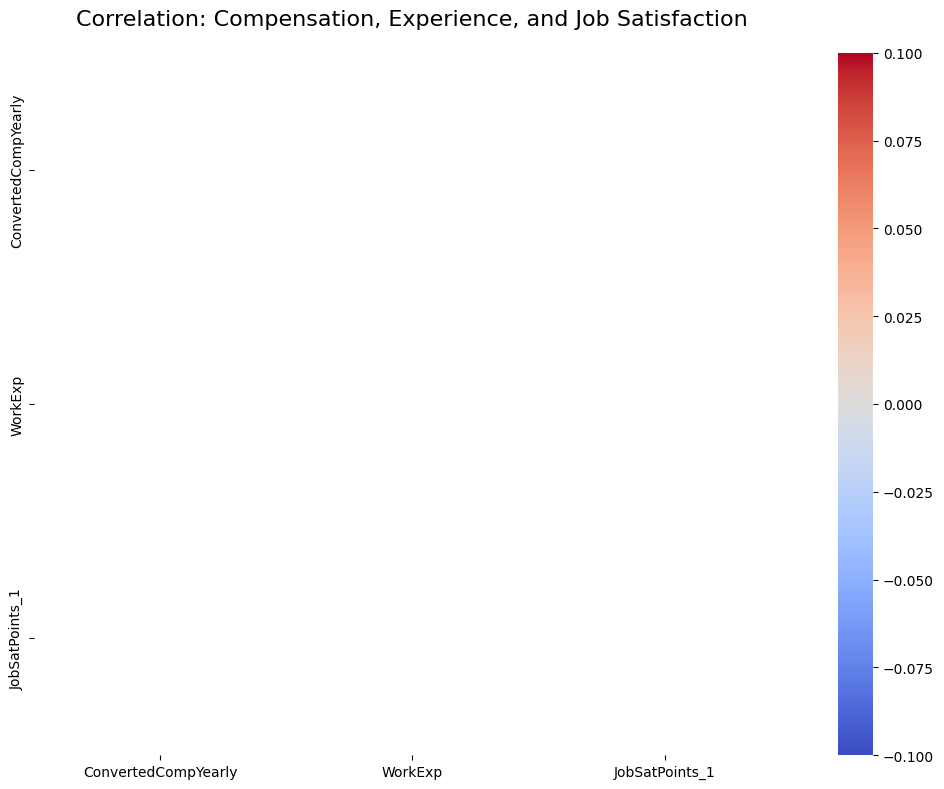

In [7]:
## Write your code here
try:
    # Attempt to load the dataset.
    df = pd.read_csv(file_url)

    # --- Data Preparation ---
    # 1. Select the columns of interest.
    df_selected = df[['ConvertedCompYearly', 'WorkExp', 'JobSat']].copy()

    # 2. Map 'JobSat' to an ordered numerical scale.
    satisfaction_mapping = {
        'Very dissatisfied': 1,
        'Slightly dissatisfied': 2,
        'Neither satisfied nor dissatisfied': 3,
        'Slightly satisfied': 4,
        'Very satisfied': 5
    }
    df_selected['JobSatPoints_1'] = df_selected['JobSat'].map(satisfaction_mapping)

    # 3. Drop rows with missing values in the key columns to ensure accurate correlation.
    df_cleaned = df_selected[['ConvertedCompYearly', 'WorkExp', 'JobSatPoints_1']].dropna()

    # --- Correlation Calculation ---
    # Compute the Pearson correlation matrix.
    correlation_matrix = df_cleaned.corr()

    print("--- Correlation Matrix ---")
    print(correlation_matrix)
    print("-" * 50)


    # --- Visualization (Heatmap) ---
    plt.figure(figsize=(10, 8))
    sns.heatmap(
        correlation_matrix,
        annot=True,       # Display the correlation values
        cmap='coolwarm',  # Use a diverging colormap
        fmt=".2f",        # Format to two decimal places
        linewidths=.5
    )

    plt.title('Correlation: Compensation, Experience, and Job Satisfaction', fontsize=16, pad=20)
    plt.tight_layout()
    print("\nDisplaying correlation heatmap...")
    plt.show()


except FileNotFoundError:
    print("\nError: The file 'survey_results_public.csv' was not found.")
    print("Please ensure the dataset file is in the correct directory and try again.")
except KeyError as e:
    print(f"\nError: Column not found in the dataset: {e}")
    print("Please check the column names in your CSV file.")



<h3>Step 8: Scatter Plot for Correlations</h3>


**Task**: Create scatter plots to examine specific correlations between `ConvertedCompYearly` and `WorkExp`, as well as between `ConvertedCompYearly` and `JobSatPoints_1`.


In [ ]:
## Write your code here

<h3>Summary</h3>


In this lab, you practiced essential skills in correlation analysis by:

- Examining the distribution of yearly compensation with histograms and box plots.
- Detecting and removing outliers from compensation data.
- Calculating correlations between key variables such as compensation, work experience, and job satisfaction.
- Visualizing relationships with scatter plots and heatmaps to gain insights into the associations between these features.

By following these steps, you have developed a solid foundation for analyzing relationships within the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
